# B5W3: End-to-End Insurance Risk Analytics & Predictive Modeling

In [55]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # Used for checking for division by zero
sns.set_style('whitegrid')

In [56]:
sys.path.append(os.path.abspath(os.path.join('..')))

In [57]:
from scripts.data_converter import DataConverter

In [58]:
df  = pd.read_csv('../data/MachineLearningRating_v3.csv', low_memory=False )

In [59]:
df.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [60]:
df.columns.tolist()

['UnderwrittenCoverID',
 'PolicyID',
 'TransactionMonth',
 'IsVATRegistered',
 'Citizenship',
 'LegalType',
 'Title',
 'Language',
 'Bank',
 'AccountType',
 'MaritalStatus',
 'Gender',
 'Country',
 'Province',
 'PostalCode',
 'MainCrestaZone',
 'SubCrestaZone',
 'ItemType',
 'mmcode',
 'VehicleType',
 'RegistrationYear',
 'make',
 'Model',
 'Cylinders',
 'cubiccapacity',
 'kilowatts',
 'bodytype',
 'NumberOfDoors',
 'VehicleIntroDate',
 'CustomValueEstimate',
 'AlarmImmobiliser',
 'TrackingDevice',
 'CapitalOutstanding',
 'NewVehicle',
 'WrittenOff',
 'Rebuilt',
 'Converted',
 'CrossBorder',
 'NumberOfVehiclesInFleet',
 'SumInsured',
 'TermFrequency',
 'CalculatedPremiumPerTerm',
 'ExcessSelected',
 'CoverCategory',
 'CoverType',
 'CoverGroup',
 'Section',
 'Product',
 'StatutoryClass',
 'StatutoryRiskType',
 'TotalPremium',
 'TotalClaims']

In [61]:
df.dtypes

UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
NumberOfDoors               

In [62]:
df.shape

(1000098, 52)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

In [64]:
df['TransactionMonth'][0]

'2015-03-01 00:00:00'

In [65]:
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'], errors='coerce')

In [66]:
df['TransactionMonth'][0]

Timestamp('2015-03-01 00:00:00')

In [67]:
print("Year:", df['TransactionMonth'][0].year)   # Output: 2015
print("Month:", df['TransactionMonth'][0].month) # Output: 3
print("Day:", df['TransactionMonth'][0].day)     # Output: 1

Year: 2015
Month: 3
Day: 1


In [68]:
df.isnull().sum()

UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                         145961
AccountType                   40232
MaritalStatus                  8259
Gender                         9536
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                     552
RegistrationYear                  0
make                            552
Model                           552
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                        552
NumberOfDoors               

In [69]:
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")


Number of duplicate rows: 0


In [70]:
print(df.describe()) # .T transposes the output for better readability

       UnderwrittenCoverID      PolicyID               TransactionMonth  \
count         1.000098e+06  1.000098e+06                        1000098   
mean          1.048175e+05  7.956682e+03  2015-02-28 10:49:29.147423744   
min           1.000000e+00  1.400000e+01            2013-10-01 00:00:00   
25%           5.514300e+04  4.500000e+03            2015-01-01 00:00:00   
50%           9.408300e+04  7.071000e+03            2015-04-01 00:00:00   
75%           1.391900e+05  1.107700e+04            2015-06-01 00:00:00   
max           3.011750e+05  2.324600e+04            2015-08-01 00:00:00   
std           6.329371e+04  5.290039e+03                            NaN   

         PostalCode        mmcode  RegistrationYear      Cylinders  \
count  1.000098e+06  9.995460e+05      1.000098e+06  999546.000000   
mean   3.020601e+03  5.487770e+07      2.010225e+03       4.046642   
min    1.000000e+00  4.041200e+06      1.987000e+03       0.000000   
25%    8.270000e+02  6.005692e+07      2.008

In [71]:
print(df[['SumInsured', 'CalculatedPremiumPerTerm', 'TotalPremium', 'TotalClaims']].describe().T)

                              count           mean           std  \
SumInsured                1000098.0  604172.732589  1.508332e+06   
CalculatedPremiumPerTerm  1000098.0     117.875691  3.997017e+02   
TotalPremium              1000098.0      61.905496  2.302845e+02   
TotalClaims               1000098.0      64.861190  2.384075e+03   

                                   min        25%          50%            75%  \
SumInsured                    0.010000  5000.0000  7500.000000  250000.000000   
CalculatedPremiumPerTerm      0.000000     3.2248     8.436900      90.000000   
TotalPremium               -782.576754     0.0000     2.178333      21.929825   
TotalClaims              -12002.412281     0.0000     0.000000       0.000000   

                                   max  
SumInsured                1.263620e+07  
CalculatedPremiumPerTerm  7.442217e+04  
TotalPremium              6.528260e+04  
TotalClaims               3.930921e+05  


### Summarize Categorical Data

In [72]:
print("\nDescriptive Statistics for Categorical Columns:")
print(df.describe(include='object').T)


Descriptive Statistics for Categorical Columns:
                      count unique                                 top  \
Citizenship         1000098      4                                       
LegalType           1000098      6                          Individual   
Title               1000098      5                                  Mr   
Language            1000098      1                             English   
Bank                 854137     11                 First National Bank   
AccountType          959866      3                     Current account   
MaritalStatus        991839      3                       Not specified   
Gender               990562      3                       Not specified   
Country             1000098      1                        South Africa   
Province            1000098      9                             Gauteng   
MainCrestaZone      1000098     16     Transvaal (all except Pretoria)   
SubCrestaZone       1000098     45                        Johan

In [73]:
# Check the unique values and their frequencies for key categorical columns
print("\nValue counts for 'make':")
print(df['make'].value_counts().head(10)) # Top 10 most frequent makes

print("\nValue counts for 'Country':")
print(df['Country'].value_counts())

print("\nUnique values in 'VehicleType':")
print(df['VehicleType'].unique())


Value counts for 'make':
make
TOYOTA                                 813280
MERCEDES-BENZ                           41940
CMC                                     21624
VOLKSWAGEN                              20929
C.A.M                                   16171
GOLDEN JOURNEY                          14462
NISSAN/DATSUN                           10997
JINBEI                                  10374
IVECO                                    8430
AUDI                                     7407
Name: count, dtype: int64

Value counts for 'Country':
Country
South Africa    1000098
Name: count, dtype: int64

Unique values in 'VehicleType':
['Passenger Vehicle' 'Medium Commercial' 'Heavy Commercial'
 'Light Commercial' 'Bus' nan]


#### Calculate the Overall Loss Ratio for the Portfolio

In [74]:
# Calculate the sum of all claims and all premiums
total_claims = df['TotalClaims'].sum()
total_premium = df['TotalPremium'].sum()

# Calculate the overall Loss Ratio
# Add a check to avoid division by zero if total premium is 0
if total_premium > 0:
    overall_loss_ratio = total_claims / total_premium
    print(f"Overall Loss Ratio for the portfolio: {overall_loss_ratio:.2%}")
else:
    print("Cannot calculate overall Loss Ratio: Total Premium is zero.")

Overall Loss Ratio for the portfolio: 104.77%


- A loss ratio less than 100% (1.00) means the company is making a profit from underwriting.
- A loss ratio greater than 100% (1.00) means the company is paying out more in claims than it is collecting in premiums.
- So, 104.77% mean company is paying out more in claims than it is collecting in premiums.

#### Loss Ratio by Province

In [75]:
# Group by Province and sum the TotalClaims and TotalPremium
loss_ratio_by_province = df.groupby('Province')[['TotalClaims', 'TotalPremium']].sum()

# Calculate the Loss Ratio for each Province
loss_ratio_by_province['LossRatio'] = np.where(
    loss_ratio_by_province['TotalPremium'] > 0, 
    loss_ratio_by_province['TotalClaims'] / loss_ratio_by_province['TotalPremium'], 
)

# Sort the results to see the highest loss ratios first
loss_ratio_by_province = loss_ratio_by_province.sort_values('LossRatio', ascending=False)

print("\nLoss Ratio by Province (sorted by highest Loss Ratio):")
print(loss_ratio_by_province[['TotalPremium', 'TotalClaims', 'LossRatio']])

ValueError: either both or neither of x and y should be given

- Gauteng, KwaZulu-Natal, and Western Cape are Unprofitable
- Northern Cape is the Most Profitable

####  Loss Ratio by VehicleType

In [ ]:
# Group by VehicleType and sum the claims and premiums
loss_ratio_by_vehicle_type = df.groupby('VehicleType')[['TotalClaims', 'TotalPremium']].sum()

# Calculate the Loss Ratio for each VehicleType
loss_ratio_by_vehicle_type['LossRatio'] = np.where(
    loss_ratio_by_vehicle_type['TotalPremium'] > 0,
    loss_ratio_by_vehicle_type['TotalClaims'] / loss_ratio_by_vehicle_type['TotalPremium'],
    0
)

# Sort the results and filter out types with very low premium volumes if needed
loss_ratio_by_vehicle_type = loss_ratio_by_vehicle_type.sort_values('TotalPremium', ascending=False)

print("\nLoss Ratio by VehicleType (sorted by highest Premium Volume):")
print(loss_ratio_by_vehicle_type[['TotalPremium', 'TotalClaims', 'LossRatio']])


Loss Ratio by VehicleType (sorted by highest Premium Volume):
                   TotalPremium   TotalClaims  LossRatio
VehicleType                                             
Passenger Vehicle  5.664202e+07  5.937207e+07   1.048198
Medium Commercial  3.922746e+06  4.119867e+06   1.050251
Heavy Commercial   4.609479e+05  7.504746e+05   1.628112
Light Commercial   2.604975e+05  6.045250e+04   0.232066
Bus                5.824474e+04  7.996535e+03   0.137292


C:\Users\girmachew\AppData\Local\Temp\ipykernel_3096\1940295199.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loss_ratio_by_vehicle_type = df.groupby('VehicleType')[['TotalClaims', 'TotalPremium']].sum()


- Heavy Commercial highly unprofitable
- Medium Commercial slightly unprofitable
- Light Commercial and Bus  are highly profitable

#### Loss Ratio by Gender

In [ ]:
# Group by Gender and sum the claims and premiums
loss_ratio_by_gender = df.groupby('Gender')[['TotalClaims', 'TotalPremium']].sum()

# Calculate the Loss Ratio for each Gender
loss_ratio_by_gender['LossRatio'] = np.where(
    loss_ratio_by_gender['TotalPremium'] > 0,
    loss_ratio_by_gender['TotalClaims'] / loss_ratio_by_gender['TotalPremium'],
    0
)

print("\nLoss Ratio by Gender:")
print(loss_ratio_by_gender[['TotalPremium', 'TotalClaims', 'LossRatio']])


Loss Ratio by Gender:
               TotalPremium   TotalClaims  LossRatio
Gender                                              
Female         3.044806e+05  2.502461e+05   0.821879
Male           1.580143e+06  1.396704e+06   0.883910
Not specified  5.920275e+07  6.271410e+07   1.059311


C:\Users\girmachew\AppData\Local\Temp\ipykernel_3096\2338693006.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loss_ratio_by_gender = df.groupby('Gender')[['TotalClaims', 'TotalPremium']].sum()


- Female and Male : Both of these categories are profitable, with premiums collected comfortably exceeding claims paid out. The Female segment appears slightly more profitable than the Male segment.
- Not specified (1.05): This category is unprofitable, operating at a loss. For every R1 of premium collected from this segment, R1.05 is paid out in claims.

#### Visualization

In [ ]:
# --- Visualize Loss Ratio by Province ---
# Filter out provinces with very low premium to make the plot more meaningful
provinces_to_plot = loss_ratio_by_province[loss_ratio_by_province['TotalPremium'] > 1000].copy() # Adjust threshold as needed
provinces_to_plot['LossRatio_percent'] = provinces_to_plot['LossRatio'] * 100

plt.figure(figsize=(12, 8))
sns.barplot(x='LossRatio_percent', y=provinces_to_plot.index, data=provinces_to_plot, palette='viridis')
plt.axvline(x=overall_loss_ratio * 100, color='red', linestyle='--', label=f'Overall Avg ({overall_loss_ratio:.2%})')
plt.title('Loss Ratio by Province')
plt.xlabel('Loss Ratio (%)')
plt.ylabel('Province')
plt.legend()
plt.show()

# --- Visualize Loss Ratio by VehicleType ---
vehicles_to_plot = loss_ratio_by_vehicle_type[loss_ratio_by_vehicle_type['TotalPremium'] > 500].copy() # Adjust threshold
vehicles_to_plot['LossRatio_percent'] = vehicles_to_plot['LossRatio'] * 100

plt.figure(figsize=(12, 8))
sns.barplot(x='LossRatio_percent', y=vehicles_to_plot.index, data=vehicles_to_plot, palette='rocket')
plt.axvline(x=overall_loss_ratio * 100, color='red', linestyle='--', label=f'Overall Avg ({overall_loss_ratio:.2%})')
plt.title('Loss Ratio by Vehicle Type')
plt.xlabel('Loss Ratio (%)')
plt.ylabel('Vehicle Type')
plt.legend()
plt.show()

# --- Visualize Loss Ratio by Gender ---
gender_to_plot = loss_ratio_by_gender.copy()
gender_to_plot['LossRatio_percent'] = gender_to_plot['LossRatio'] * 100

plt.figure(figsize=(8, 6))
sns.barplot(x=gender_to_plot.index, y='LossRatio_percent', data=gender_to_plot, palette='Set2')
plt.axhline(y=overall_loss_ratio * 100, color='red', linestyle='--', label=f'Overall Avg ({overall_loss_ratio:.2%})')
plt.title('Loss Ratio by Gender')
plt.xlabel('Gender')
plt.ylabel('Loss Ratio (%)')
plt.legend()
plt.show()

KeyError: 'LossRatio'

In [ ]:
# Filter the DataFrame to see only the 'Not specified' gender rows
not_specified_gender_df = df[df['Gender'] == 'Not specified']

# Check the value counts for the 'LegalType' column in this filtered DataFrame
print("LegalType distribution for 'Not specified' gender:")
print(not_specified_gender_df['LegalType'].value_counts(normalize=True))

# Also, check the 'Title' column, as it might give clues
print("\nTitle distribution for 'Not specified' gender:")
print(not_specified_gender_df['Title'].value_counts(dropna=False))

LegalType distribution for 'Not specified' gender:
LegalType
Individual           0.922059
Private company      0.074456
Close Corporation    0.001553
Public company       0.001376
Partnership          0.000352
Sole proprieter      0.000205
Name: proportion, dtype: float64

Title distribution for 'Not specified' gender:
Title
Mr      881202
Mrs      43490
Ms        9014
Miss      6474
Dr         810
Name: count, dtype: int64


In [76]:
input_file_path = os.path.join('B5W3_End_to_End_Insurance_Risk_Analytics_Predictive_Modeling', 'data', 'MachineLearningRating_v3.txt')
output_file_path = os.path.join('B5W3_End_to_End_Insurance_Risk_Analytics_Predictive_Modeling', 'data', 'MachineLearningRating_v3.csv')

# Create an instance (an object) of the DataConverter class
# This calls the __init__ method of the class, initializing the object
file_converter = DataConverter(input_file_path, output_file_path)

In [81]:
df = file_converter.clean_data_types(df)


--- Starting Data Type Cleaning ---
Converting date columns...
  - 'TransactionMonth' converted to datetime.
  - 'VehicleIntroDate' converted to datetime.

Converting numerical columns from object to float...
  - 'CapitalOutstanding' converted to float.

Converting count/binary columns...
  - 'Cylinders' converted to nullable integer (Int64).
  - 'NumberOfDoors' converted to nullable integer (Int64).
  - 'mmcode' converted to nullable integer (Int64).
  - 'RegistrationYear' converted to nullable integer (Int64).
  - 'PostalCode' converted to nullable integer (Int64).
  - 'AlarmImmobiliser' converted to binary integer (Int64).
  - 'TrackingDevice' converted to binary integer (Int64).
  - 'WrittenOff' converted to binary integer (Int64).
  - 'Rebuilt' converted to binary integer (Int64).
  - 'Converted' converted to binary integer (Int64).
  - 'CrossBorder' converted to binary integer (Int64).
  - 'IsVATRegistered' converted to binary integer (Int64).

Converting object columns to categ

#### Check Missing values

In [82]:
df.isnull().sum()

UnderwrittenCoverID              0
PolicyID                         0
TransactionMonth                 0
IsVATRegistered                  0
Citizenship                      0
LegalType                        0
Title                            0
Language                         0
Bank                        145961
AccountType                  40232
MaritalStatus                 8259
Gender                        9536
Country                          0
Province                         0
PostalCode                       0
MainCrestaZone                   0
SubCrestaZone                    0
ItemType                         0
mmcode                         552
VehicleType                    552
RegistrationYear                 0
make                           552
Model                          552
Cylinders                      552
cubiccapacity                  552
kilowatts                      552
bodytype                       552
NumberOfDoors                  552
VehicleIntroDate    

#### Univariate Analysis

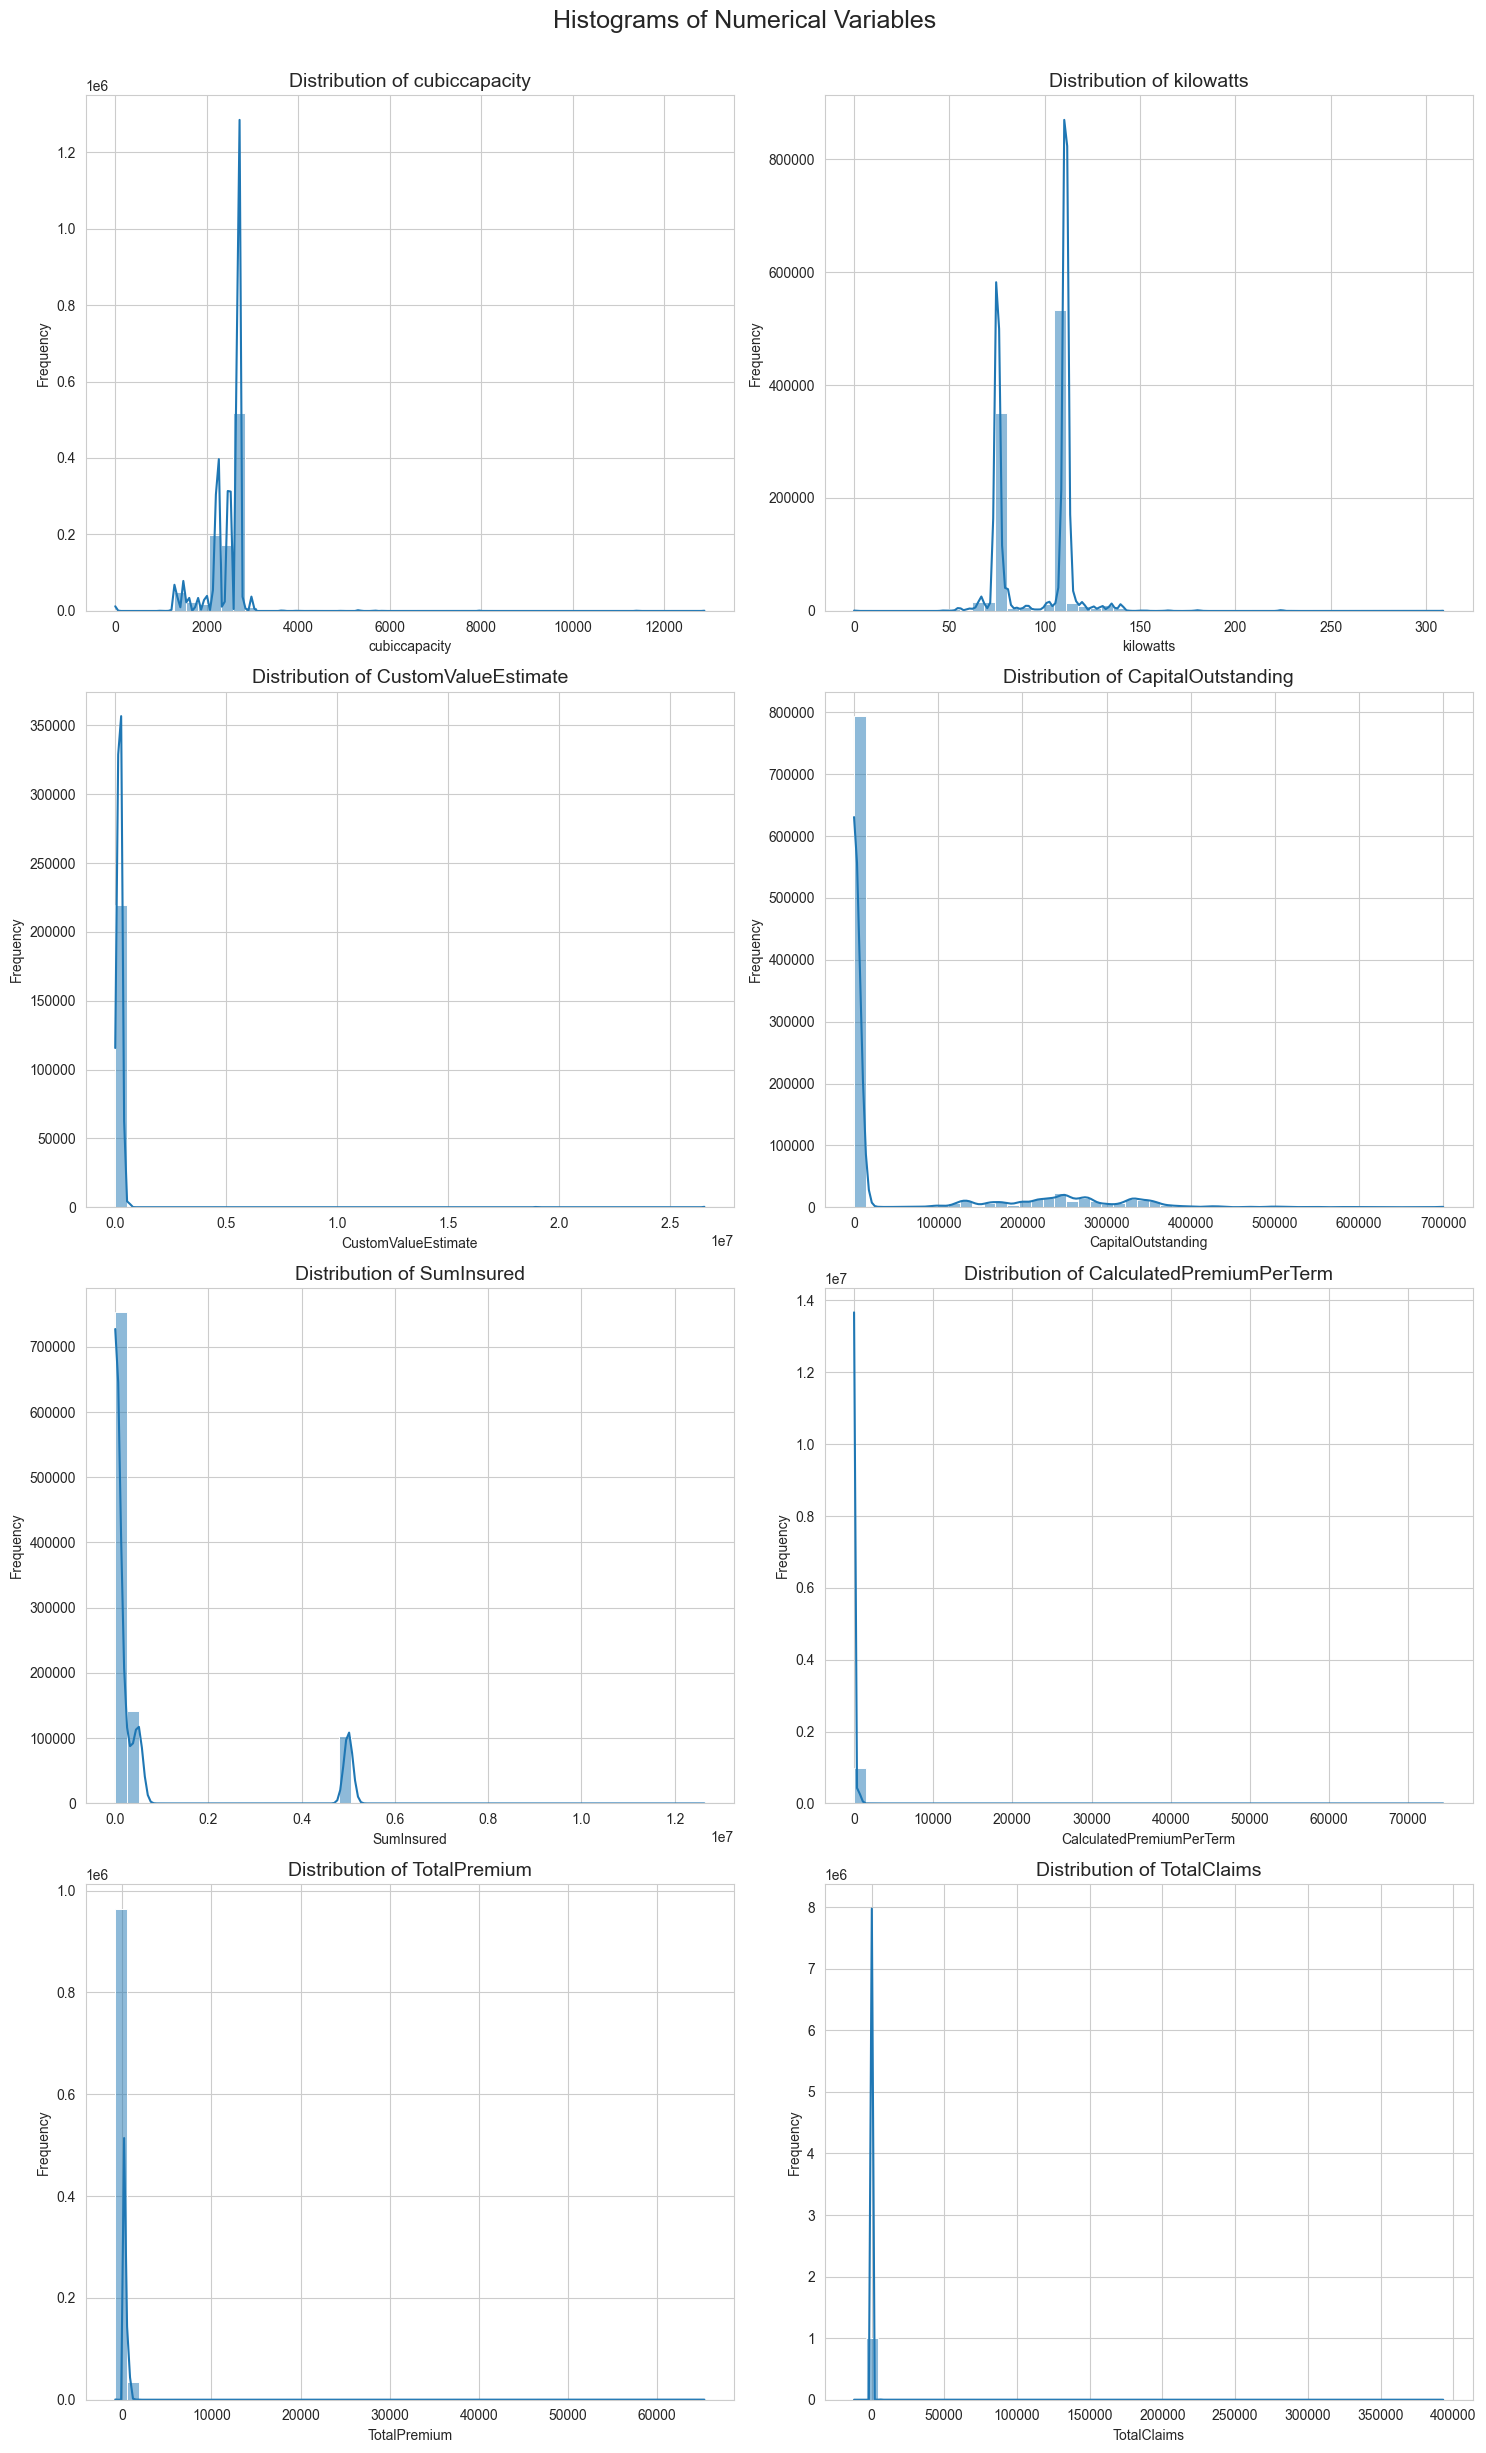

In [79]:
# Identify numerical columns to plot (excluding IDs and years which are better as categorical)
numerical_cols = ['cubiccapacity', 'kilowatts', 'CustomValueEstimate', 'CapitalOutstanding',
                  'SumInsured', 'CalculatedPremiumPerTerm', 'TotalPremium', 'TotalClaims']

# Exclude columns with all missing values
numerical_cols = [col for col in numerical_cols if col in df.columns and df[col].notna().any()]

# Define the number of rows and columns for the subplot grid
n_cols = 2
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

# Create the subplot grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 6 * n_rows))
axes = axes.flatten() # Flatten the array of axes for easy iteration

# Plot each numerical column
for i, col in enumerate(numerical_cols):
    ax = axes[i]
    # Use seaborn.histplot for a histogram with a KDE curve for smooth distribution
    sns.histplot(data=df, x=col, kde=True, ax=ax, bins=50)
    ax.set_title(f'Distribution of {col}', fontsize=14)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# Hide any unused subplots
for i in range(len(numerical_cols), len(axes)):
    axes[i].axis('off')

plt.tight_layout() # Adjust layout to prevent overlaps
plt.suptitle('Histograms of Numerical Variables', fontsize=18, y=1.02)
plt.show()

#### Bivariate or Multivariate Analysis

In [83]:
# Ensure PostalCode is treated as a string/category
# This is crucial to avoid treating it as a continuous number
df['PostalCode'] = df['PostalCode'].astype('object')

# Aggregate TotalPremium and TotalClaims by TransactionMonth and PostalCode
monthly_agg_df = df.groupby(['TransactionMonth', 'PostalCode'], as_index=False)[['TotalPremium', 'TotalClaims']].sum()

print("Aggregated DataFrame shape:", monthly_agg_df.shape)
print("\nFirst 5 rows of aggregated data:")
print(monthly_agg_df.head())

Aggregated DataFrame shape: (9706, 4)

First 5 rows of aggregated data:
  TransactionMonth PostalCode  TotalPremium   TotalClaims
0       2013-10-01       7405    151.867402      0.000000
1       2013-10-01       7766    172.206933      0.000000
2       2013-10-01       7945     46.989177      0.000000
3       2013-11-01          1   1432.740561  50585.078947
4       2013-11-01         84    120.874211      0.000000


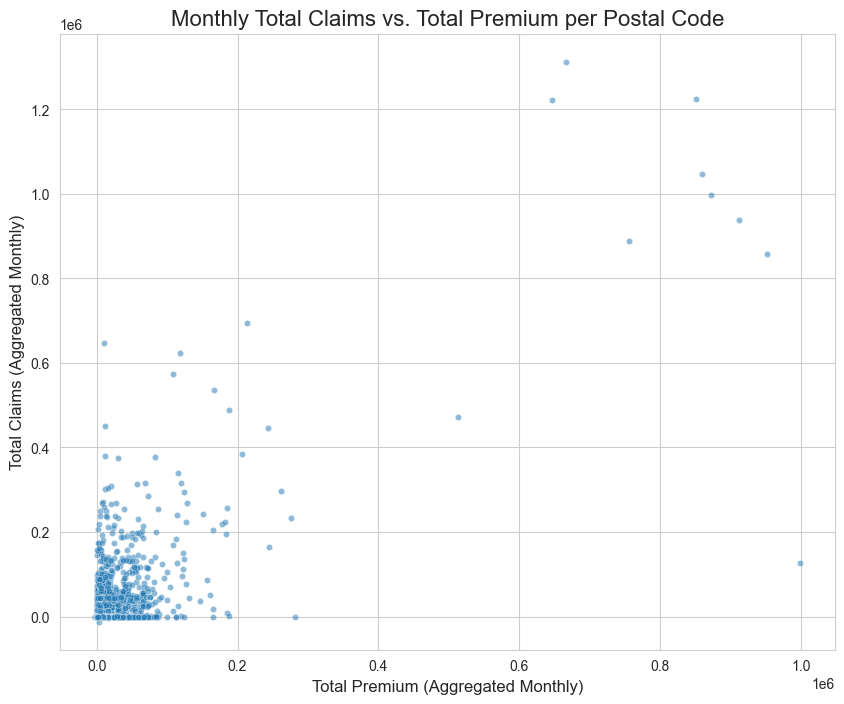

In [84]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=monthly_agg_df,
    x='TotalPremium',
    y='TotalClaims',
    alpha=0.5, # Use transparency for better visibility of data density
    s=20 # Adjust point size
)
plt.title('Monthly Total Claims vs. Total Premium per Postal Code', fontsize=16)
plt.xlabel('Total Premium (Aggregated Monthly)', fontsize=12)
plt.ylabel('Total Claims (Aggregated Monthly)', fontsize=12)
plt.grid(True)
plt.show()

Analyzing trends for the top 5 postal codes by total premium: [2000, 122, 8000, 299, 2196]


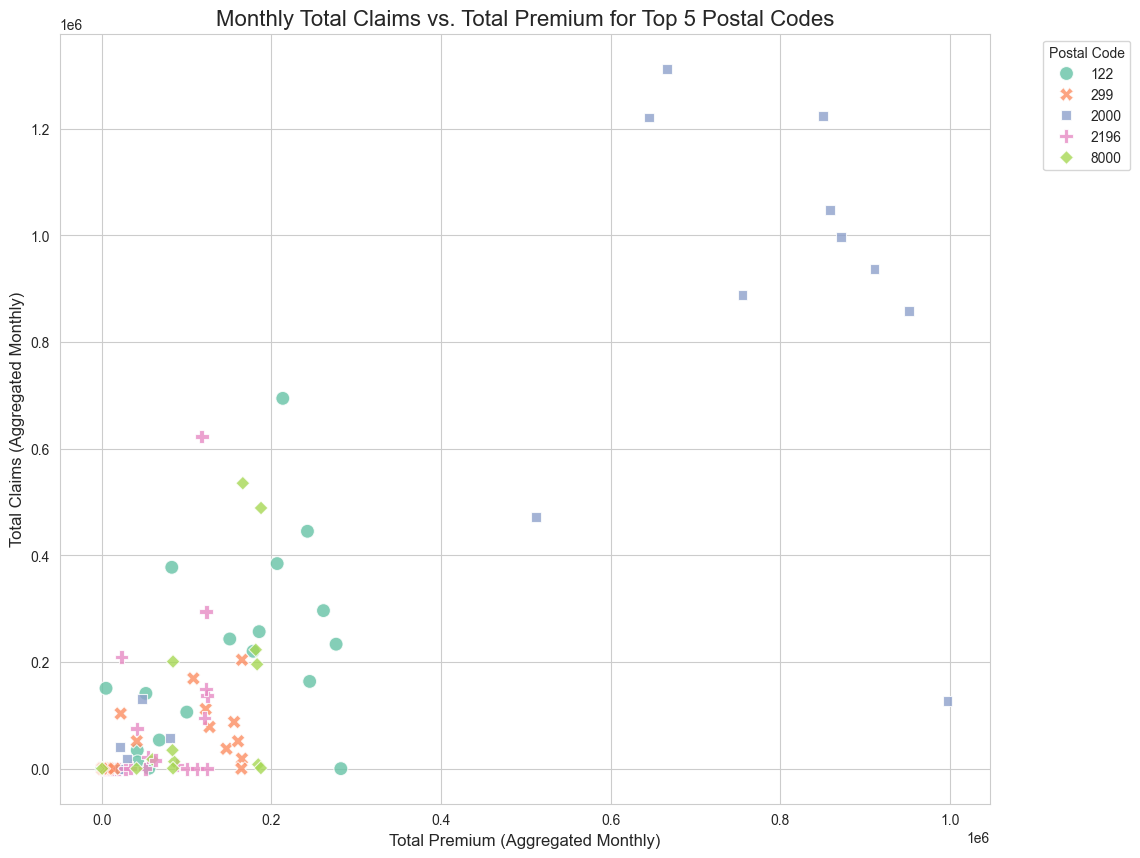

In [85]:
# Identify the top 5 postal codes by total premium
top_5_zipcodes = monthly_agg_df.groupby('PostalCode')['TotalPremium'].sum().nlargest(5).index

print("Analyzing trends for the top 5 postal codes by total premium:", top_5_zipcodes.tolist())

# Create a scatter plot for each of the top 5 zipcodes
plt.figure(figsize=(12, 10))
sns.scatterplot(
    data=monthly_agg_df[monthly_agg_df['PostalCode'].isin(top_5_zipcodes)],
    x='TotalPremium',
    y='TotalClaims',
    hue='PostalCode', # Use color to differentiate each postal code
    style='PostalCode', # Use marker style to differentiate
    s=100, # Increase point size for better visibility
    alpha=0.8,
    palette='Set2' # Use a distinct color palette
)
plt.title('Monthly Total Claims vs. Total Premium for Top 5 Postal Codes', fontsize=16)
plt.xlabel('Total Premium (Aggregated Monthly)', fontsize=12)
plt.ylabel('Total Claims (Aggregated Monthly)', fontsize=12)
plt.grid(True)
plt.legend(title='Postal Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Correlation Matrix:
              TotalPremium  TotalClaims
TotalPremium      1.000000     0.747847
TotalClaims       0.747847     1.000000


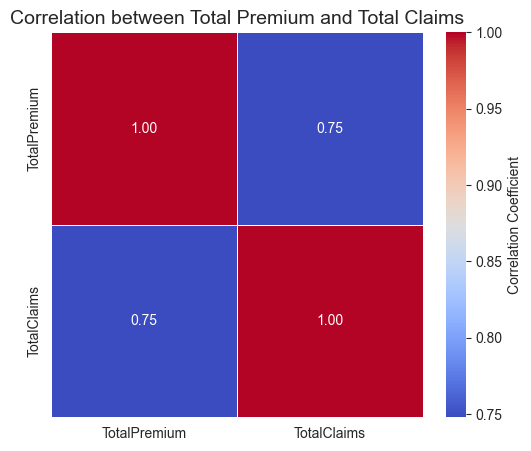

In [ ]:
# Calculate the correlation matrix for the aggregated data
correlation_matrix = monthly_agg_df[['TotalPremium', 'TotalClaims']].corr()

print("\nCorrelation Matrix:")
print(correlation_matrix)

# heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(
    correlation_matrix,
    annot=True, # Show the correlation values on the map
    cmap='coolwarm', # Use a diverging colormap
    fmt='.2f', # Format the annotations to 2 decimal places
    linewidths=.5, # Add lines to separate cells
    cbar_kws={'label': 'Correlation Coefficient'}
)
plt.title('Correlation between Total Premium and Total Claims', fontsize=14)
plt.show()

#### Data Comparison

C:\Users\girmachew\AppData\Local\Temp\ipykernel_3096\1482771473.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Province', y='TotalPremium', data=df, showfliers=False, palette='coolwarm')


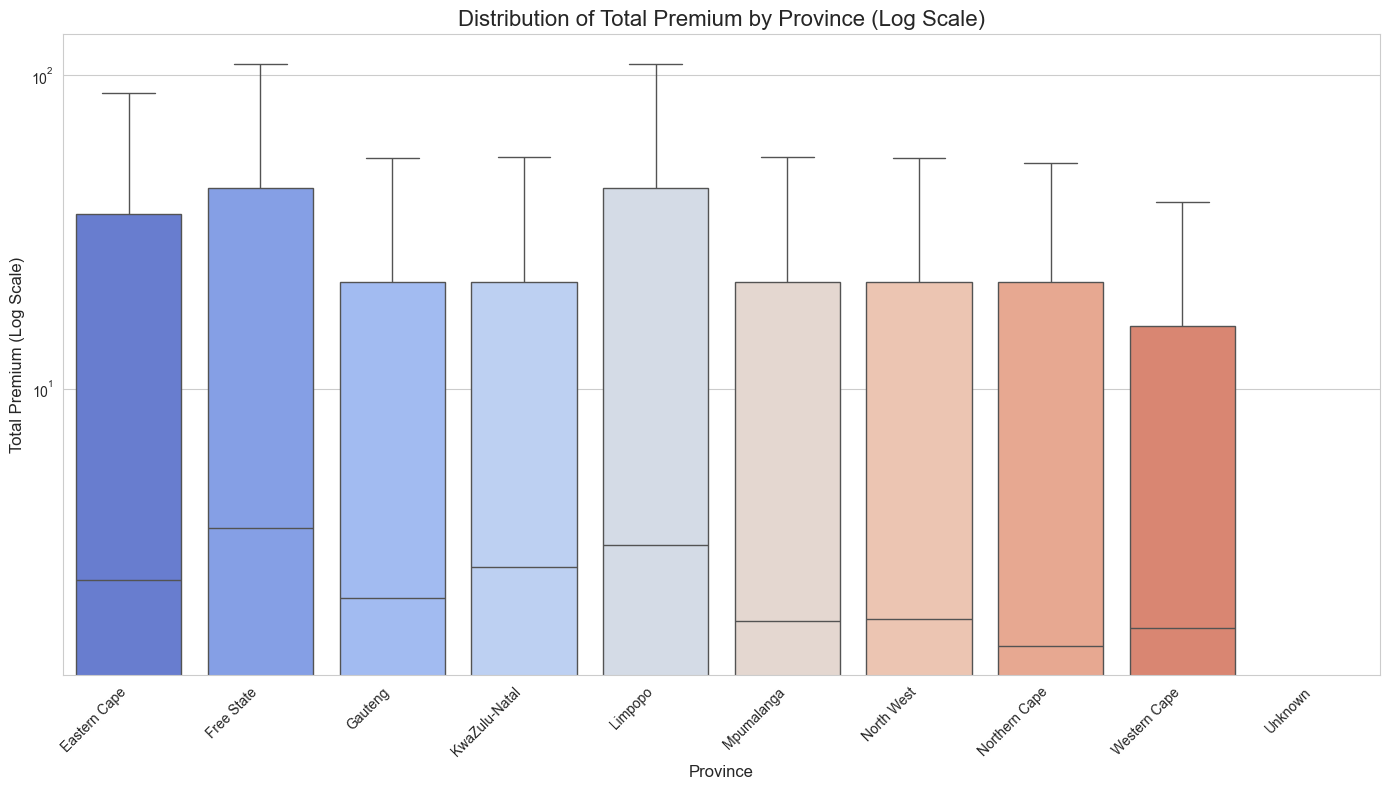

In [88]:
# Create a figure and axis for the boxplot
plt.figure(figsize=(14, 8))

# Use a boxplot to show the distribution of TotalPremium in each Province
# Use a logarithmic y-axis to handle the skewed data and large range
sns.boxplot(x='Province', y='TotalPremium', data=df, showfliers=False, palette='coolwarm')

# We can also add a swarmplot to show individual data points
# sns.swarmplot(x='Province', y='TotalPremium', data=df, color='black', size=1, alpha=0.5)

plt.yscale('log') # Set the y-axis to a logarithmic scale
plt.title('Distribution of Total Premium by Province (Log Scale)', fontsize=16)
plt.xlabel('Province', fontsize=12)
plt.ylabel('Total Premium (Log Scale)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Filtering to 9 provinces with at least 1000 policies...


C:\Users\girmachew\AppData\Local\Temp\ipykernel_3096\3431305759.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  make_province_counts = filtered_df_proportions.groupby(['Province', 'make']).size().unstack(fill_value=0)


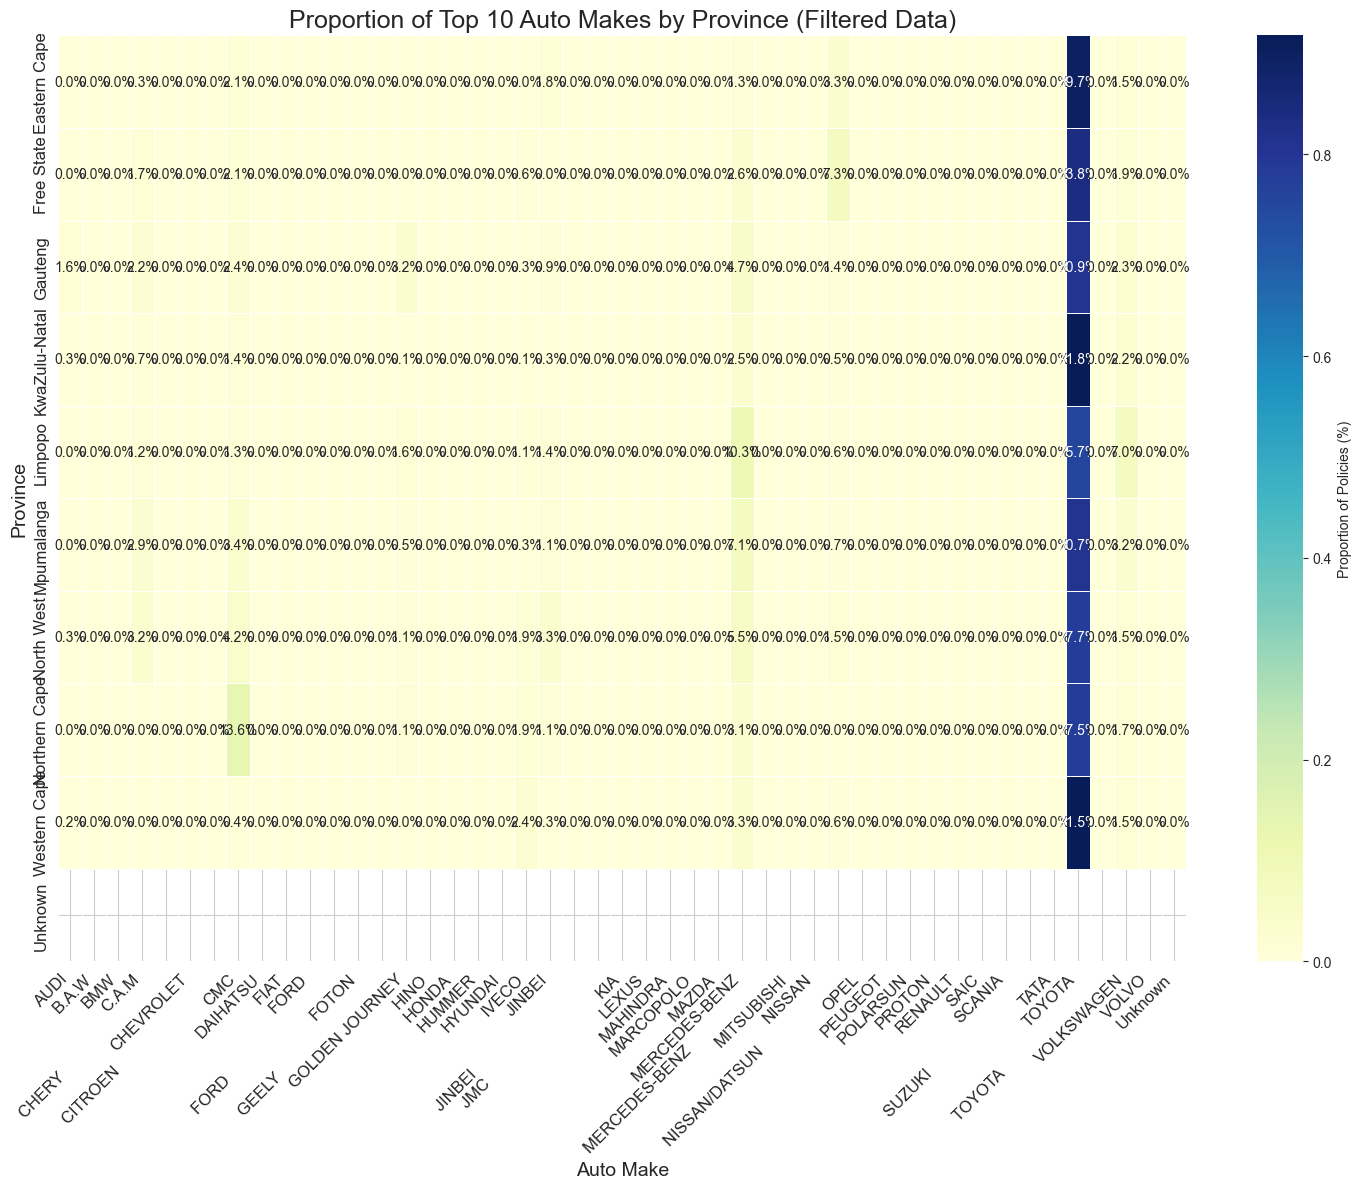

In [90]:
# --- IMPROVED CODE FOR HEATMAP ---

# 1. Filter out provinces with a low number of policies to avoid noise
# Let's consider only provinces with at least 1000 policies
province_counts = df['Province'].value_counts()
provinces_to_include = province_counts[province_counts >= 1000].index

print(f"Filtering to {len(provinces_to_include)} provinces with at least 1000 policies...")

# 2. Get the top 10 most frequent car makes from the entire dataset
top_10_makes = df['make'].value_counts().head(10).index.tolist()

# 3. Filter the DataFrame to include only the selected provinces and top 10 makes
filtered_df_proportions = df[
    df['Province'].isin(provinces_to_include) &
    df['make'].isin(top_10_makes)
]

# 4. Create the pivot table of counts for each make per Province
make_province_counts = filtered_df_proportions.groupby(['Province', 'make']).size().unstack(fill_value=0)

# 5. Normalize the counts to show proportions within each province (row-wise)
# This shows what percentage of each province's policies are for a given make
make_province_proportions = make_province_counts.div(make_province_counts.sum(axis=1), axis=0)

# 6. Plot the heatmap with improved settings
plt.figure(figsize=(15, 12)) # Increase the figure size for better readability
sns.heatmap(
    make_province_proportions,
    annot=True,              # Display the proportion values
    fmt='.1%',               # Format as percentage with 1 decimal place
    cmap='YlGnBu',           # Use a sequential colormap
    linewidths=.5,           # Add lines to separate cells
    cbar_kws={'label': 'Proportion of Policies (%)'},
    annot_kws={"fontsize": 10} # Adjust annotation font size to prevent overlap
)
plt.title('Proportion of Top 10 Auto Makes by Province (Filtered Data)', fontsize=18)
plt.xlabel('Auto Make', fontsize=14)
plt.ylabel('Province', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()